In [4]:
######################################################################
# GELİŞMİŞ FONKSİYONEL KEŞİFÇİ VERİ ANALİZİ (ADVANCED FUNCTIONAL EDA) 
# & VERİ BİÇİMLENDİRME
######################################################################
# 1. Genel Resim
# 2. Kategorik Değişken Analizi (Analysis of Categorical Variables)
# 3. Sayısal Değişken Analizi (Analysis of Numerical Variables)
# 4. Hedef Değişken Analizi (Analysis of Target Variable)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
csv = "data/amazon_products.csv"
df = pd.read_csv(csv)
print(df.columns)
print(df.head())

Index(['Link', 'Urun_adi', 'Puan', 'Degerlendirme', 'Fiyatlar'], dtype='object')
                                                Link  \
0  https://www.amazon.com.tr/Einhell-18V-Starter-...   
1  https://www.amazon.com.tr/Flora-Topra%C4%9F%C4...   
2  https://www.amazon.com.tr/Bayer-Othrine-Hamam-...   
3  https://www.amazon.com.tr/K%C4%B1rm%C4%B1z%C4%...   
4  https://www.amazon.com.tr/Karcher-Bas%C4%B1n%C...   

                                            Urun_adi                    Puan  \
0  Einhell 18V 4,0 Ah PXC Starter Kit (Başlangıç ...  5 yıldız üzerinden 4,7   
1  Vera İthal Torf Cocopeat Saksı Çiçek Toprağı P...  5 yıldız üzerinden 4,4   
2           Bayer K Othrine 50 ml Hamam Böceği İlacı  5 yıldız üzerinden 4,6   
3  Kırmızı Pomza Taşı 8-16 Mm 5 Litre Volkanik Po...  5 yıldız üzerinden 4,4   
4  Karcher K3 Basınçlı Yıkama Makinesi, Plastik, ...  5 yıldız üzerinden 4,4   

  Degerlendirme    Fiyatlar  
0        23.496  1.139,00TL  
1           148     79,90TL  
2          

In [5]:
import pandas as pd
import numpy as np

csv = "data/amazon_products.csv"
df = pd.read_csv(csv)

def fiyatlar():
    df['Fiyatlar'] = df['Fiyatlar'].str.replace('[^\d,]', '', regex=True)  
    df['Fiyatlar'] = df['Fiyatlar'].str.replace(',', '.', regex=True)
    df['Fiyatlar'] = df['Fiyatlar'].astype(float)
    df['Fiyatlar'] = df['Fiyatlar'].replace(0.0, np.nan)
    
def puan():
    df['Puan'] = df['Puan'].str.split('5 yıldız üzerinden ', expand=True)[1].str.replace(',', '.', regex=True).astype(float)
    df['Puan'] = df['Puan'].replace('', np.nan)

def degerlendirme():
    df['Degerlendirme'] = df['Degerlendirme'].str.replace('[^0-9]', '', regex=True)
    df['Degerlendirme'] = df['Degerlendirme'].replace('', np.nan)
    df['Degerlendirme'] = df['Degerlendirme'].astype(float).astype('Int64')


degerlendirme()
puan()
fiyatlar()

In [6]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
check_df(df, head=5)

##################### Shape #####################
(6960, 5)
##################### Types #####################
Link              object
Urun_adi          object
Puan             float64
Degerlendirme      Int64
Fiyatlar         float64
dtype: object
##################### Head #####################
                                                Link  \
0  https://www.amazon.com.tr/Einhell-18V-Starter-...   
1  https://www.amazon.com.tr/Flora-Topra%C4%9F%C4...   
2  https://www.amazon.com.tr/Bayer-Othrine-Hamam-...   
3  https://www.amazon.com.tr/K%C4%B1rm%C4%B1z%C4%...   
4  https://www.amazon.com.tr/Karcher-Bas%C4%B1n%C...   

                                            Urun_adi  Puan  Degerlendirme  \
0  Einhell 18V 4,0 Ah PXC Starter Kit (Başlangıç ...   4.7          23496   
1  Vera İthal Torf Cocopeat Saksı Çiçek Toprağı P...   4.4            148   
2           Bayer K Othrine 50 ml Hamam Böceği İlacı   4.6            137   
3  Kırmızı Pomza Taşı 8-16 Mm 5 Litre Volkanik Po...   4.

                                                    Link     Ratio
Link                                                              
https://www.amazon.com.tr/Einhell-18V-Starter-B...     1  0.014368
https://www.amazon.com.tr/Elixir-009-042-Elektr...     1  0.014368
https://www.amazon.com.tr/Elektro-Akustik-Tek-H...     1  0.014368
https://www.amazon.com.tr/M-Audio-AIR-192-2-%C3...     1  0.014368
https://www.amazon.com.tr/RODE-Wireless-GO-II-m...     1  0.014368
...                                                  ...       ...
https://www.amazon.com.tr/Royal-Canin-German-Sh...     1  0.014368
https://www.amazon.com.tr/BYPET-Nesil-Nefes-Ala...     1  0.014368
https://www.amazon.com.tr/Brit-Tah%C4%B1ls%C4%B...     1  0.014368
https://www.amazon.com.tr/Reflex-Tavuklu-Yavru-...     1  0.014368
https://www.amazon.com.tr/Fause-Tepe-Ba%C5%9Fl%...     1  0.014368

[6960 rows x 2 columns]
##########################################
                                                    Urun_adi 

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


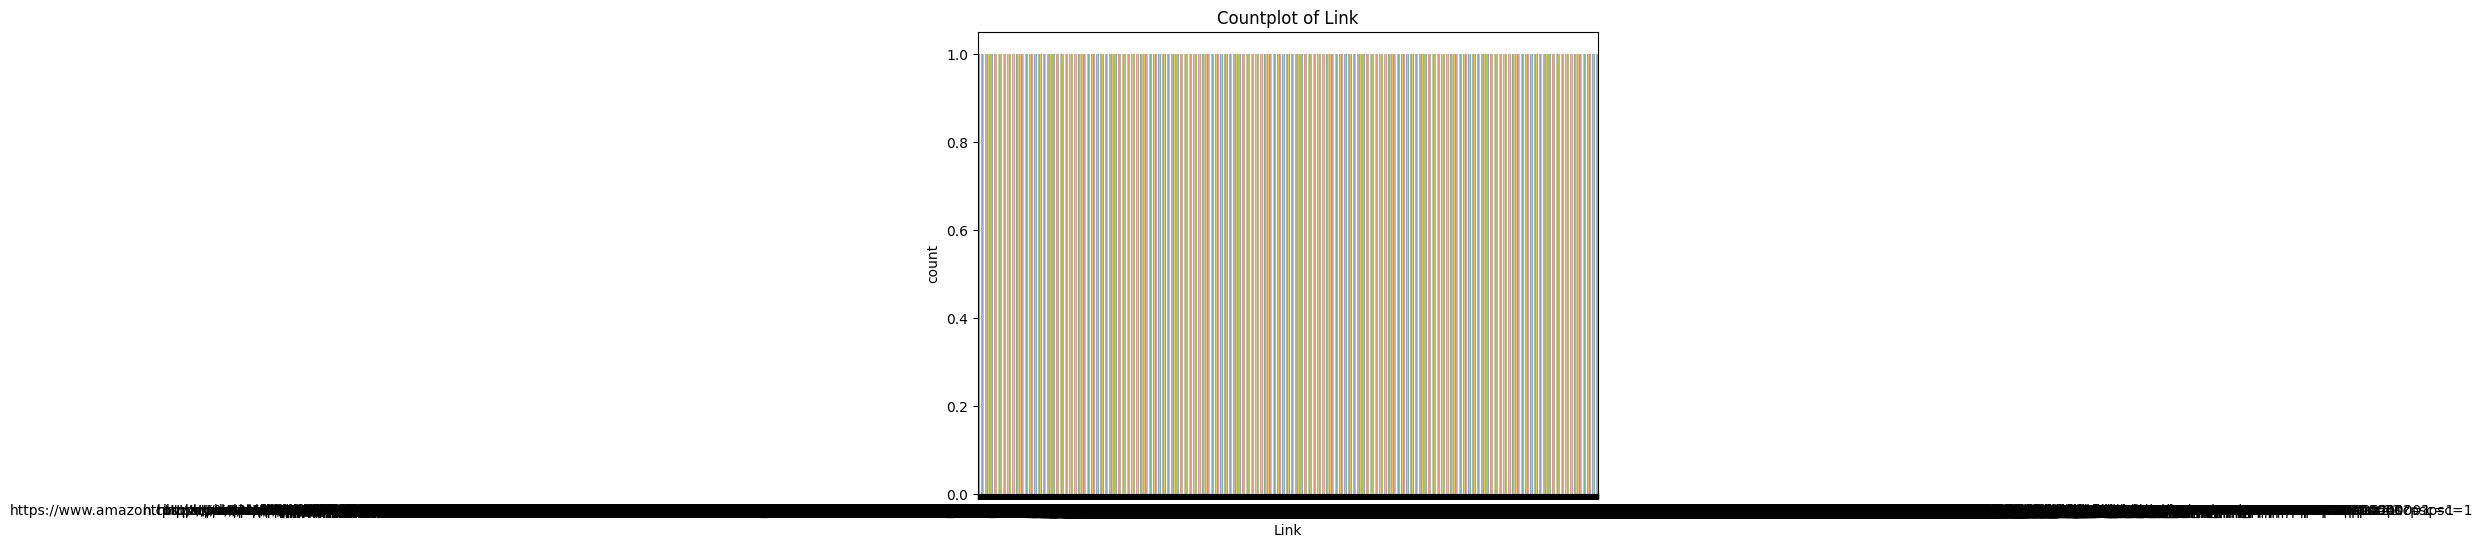

                                                    Urun_adi      Ratio
Urun_adi                                                               
NaN                                                     1185  17.025862
Amazon.com.tr E-Hediye Kartı                             161   2.313218
Crestwood Waterproof Kadın Ayakkabı                        3   0.043103
SALOMON QUEST ELEMENT GTX Yürüyüş Botu Erkek               3   0.043103
Philips SPS1040B/51 2 Metre 4lü Akım Koruyumalı...         3   0.043103
...                                                      ...        ...
PRO PLAN Medium Adult Kuzu Etli Köpek Maması 14 kg         1   0.014368
Otomatik Hareket Eden Akıllı Kedi Topu Oyuncağı...         1   0.014368
Düşük Tahıllı Tavuk Ve Narlı Kısırlaştırılmış K...         1   0.014368
Advance Somonlu Kısırlaştırılmış Kedi Maması, 3 Kg         1   0.014368
Fause Tepe Duş Başlığı Kare Slim 304 Metal 25x2...         1   0.014368

[5537 rows x 2 columns]
#######################################

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


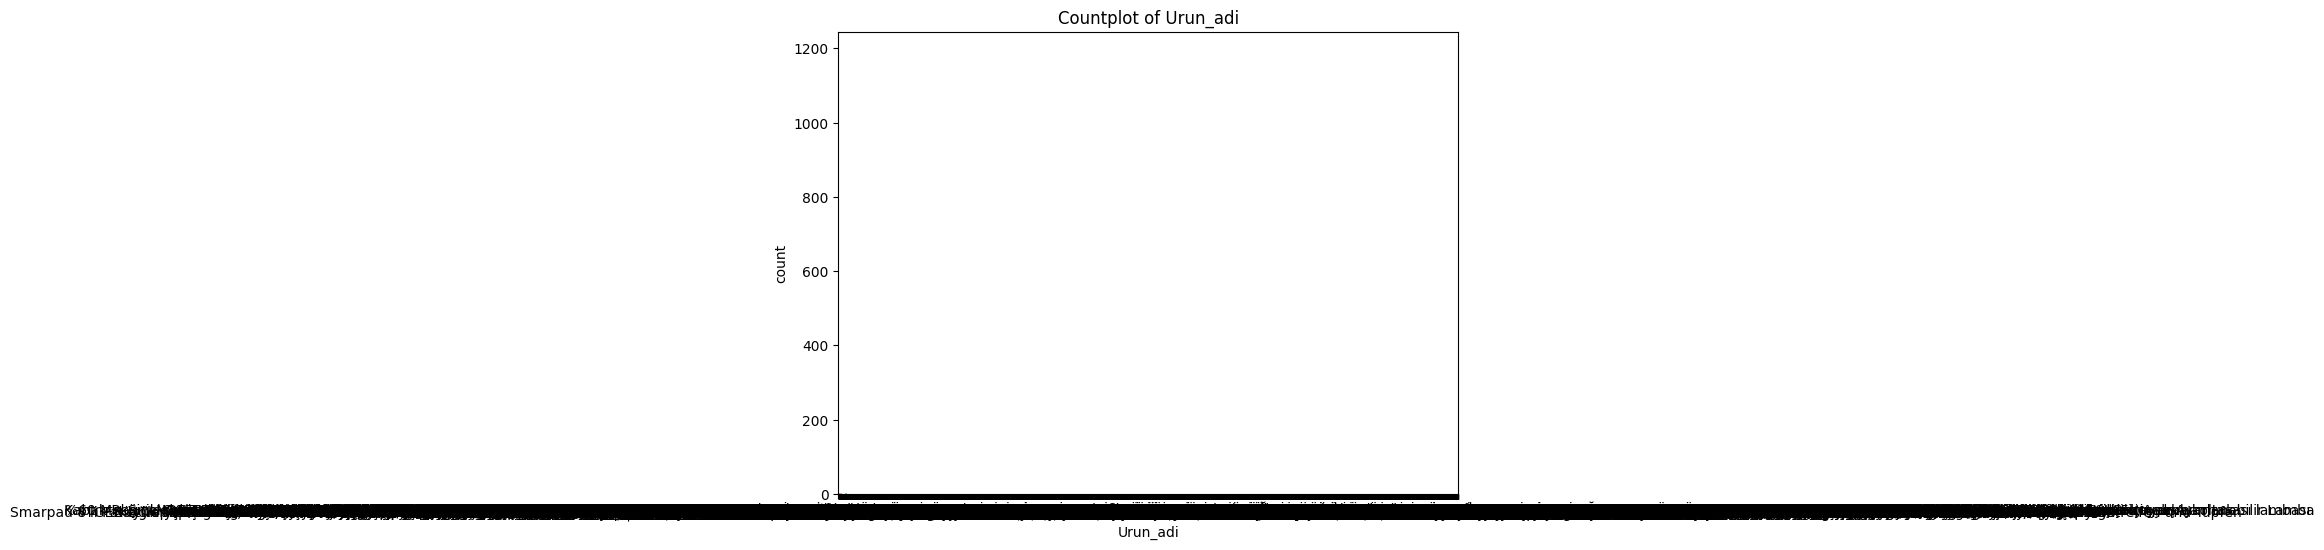

      Puan      Ratio
Puan                 
4.7    941  13.520115
4.6    941  13.520115
4.5    791  11.364943
4.8    788  11.321839
4.4    662   9.511494
4.3    477   6.853448
NaN    438   6.293103
4.2    369   5.301724
5.0    354   5.086207
4.1    255   3.663793
4.0    193   2.772989
4.9    186   2.672414
3.9    119   1.709770
3.8     94   1.350575
3.7     68   0.977011
3.6     49   0.704023
3.5     42   0.603448
3.4     41   0.589080
3.0     36   0.517241
3.3     27   0.387931
1.0     17   0.244253
3.2     16   0.229885
3.1     13   0.186782
2.9      9   0.129310
2.0      5   0.071839
2.5      5   0.071839
2.6      4   0.057471
2.4      4   0.057471
2.1      4   0.057471
2.7      3   0.043103
1.8      2   0.028736
2.3      2   0.028736
2.8      2   0.028736
1.5      1   0.014368
1.4      1   0.014368
2.2      1   0.014368
##########################################


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


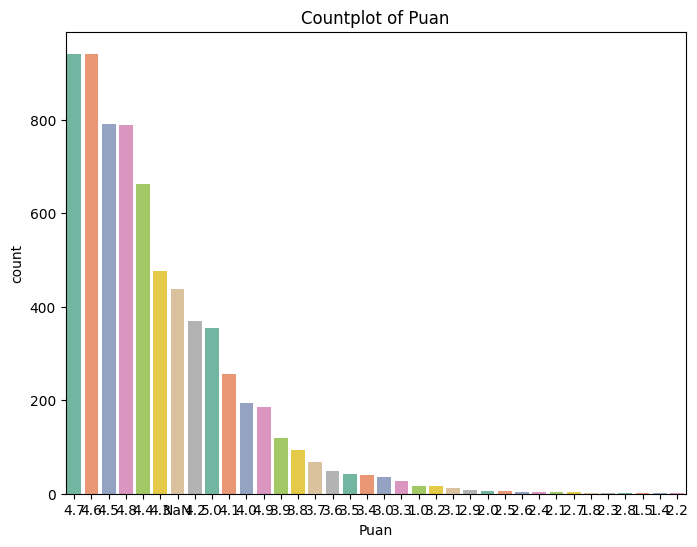

               Degerlendirme      Ratio
Degerlendirme                          
-9999                   1018  14.626437
1                        164   2.356322
1709                     161   2.313218
2                        131   1.882184
3                         90   1.293103
...                      ...        ...
358                        1   0.014368
1196                       1   0.014368
534                        1   0.014368
3050                       1   0.014368
709                        1   0.014368

[1832 rows x 2 columns]
##########################################


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


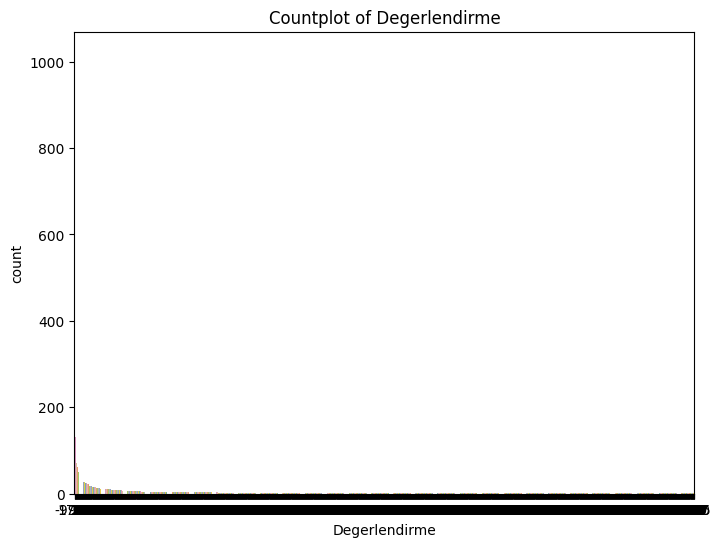

          Fiyatlar     Ratio
Fiyatlar                    
11.0           342  4.913793
Missing        169  2.428161
99.0            41  0.589080
59.9            34  0.488506
99.9            33  0.474138
...            ...       ...
47.75            1  0.014368
119.95           1  0.014368
97.73            1  0.014368
104.94           1  0.014368
534.9            1  0.014368

[3871 rows x 2 columns]
##########################################


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


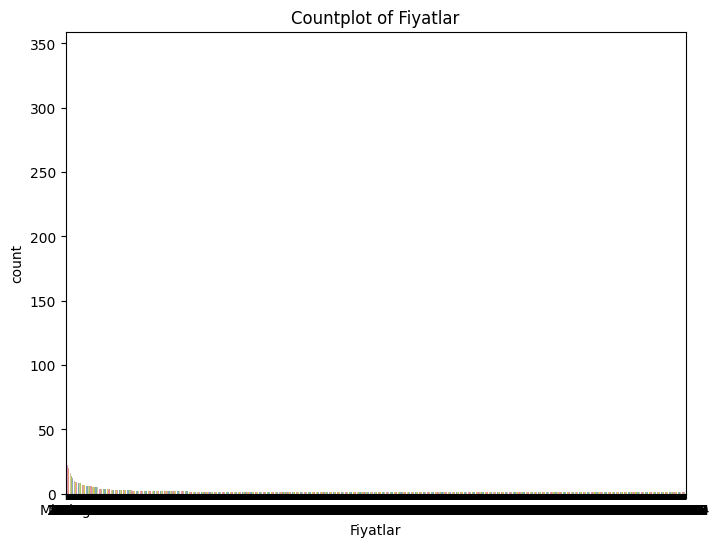

In [11]:
###################################################################
# 2. Kategorik Değişken Analizi (Analysis of Categorical Variables)
###################################################################

cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]

num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int", "float"]]

cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]

cat_cols = cat_cols + num_but_cat

cat_cols = [col for col in cat_cols if col not in cat_but_car]

df[cat_cols].nunique()

[col for col in df.columns if col not in cat_cols]


def cat_summary(dataframe, cols):
    for col_name in cols:    
        print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                            "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
        print("##########################################")
cat_summary(df,df.columns)


def cat_summary_with_plots(dataframe, col_names, plot=False, nan_placeholder='Missing'):
    for col_name in col_names:
        if dataframe[col_name].dtype == "bool":
            dataframe[col_name] = dataframe[col_name].astype(int)

        dataframe[col_name] = dataframe[col_name].fillna(nan_placeholder)

        print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                            "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
        print("##########################################")

        if plot:
            plt.figure(figsize=(8, 6))
            sns.countplot(x=dataframe[col_name], data=dataframe, palette="Set2", order=dataframe[col_name].value_counts().index)
            plt.title(f"Countplot of {col_name}")
            plt.show()
cat_summary_with_plots(df, df.columns, plot=True)



count                                                  6960
unique                                                 6960
top       https://www.amazon.com.tr/Einhell-18V-Starter-...
freq                                                      1
Name: Link, dtype: object
count     6960
unique    5537
top        NaN
freq      1185
Name: Urun_adi, dtype: object
count     6960.0
unique      36.0
top          4.7
freq       941.0
Name: Puan, dtype: float64
count          6960.0
mean       822.335057
std      13743.169012
min           -9999.0
5%            -9999.0
10%           -9999.0
20%               3.0
30%              15.0
40%              42.0
50%              92.0
60%             192.4
70%             391.0
80%            1064.4
90%            3009.9
95%           7846.55
99%          38137.89
max          471665.0
Name: Degerlendirme, dtype: Float64
count     6960.0
unique    3871.0
top         11.0
freq       342.0
Name: Fiyatlar, dtype: float64
count                                   

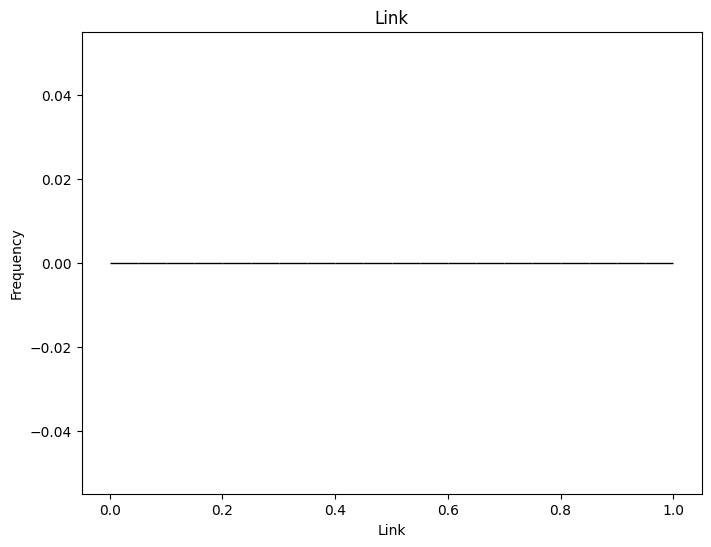

count     6960
unique    5537
top        NaN
freq      1185
Name: Urun_adi, dtype: object


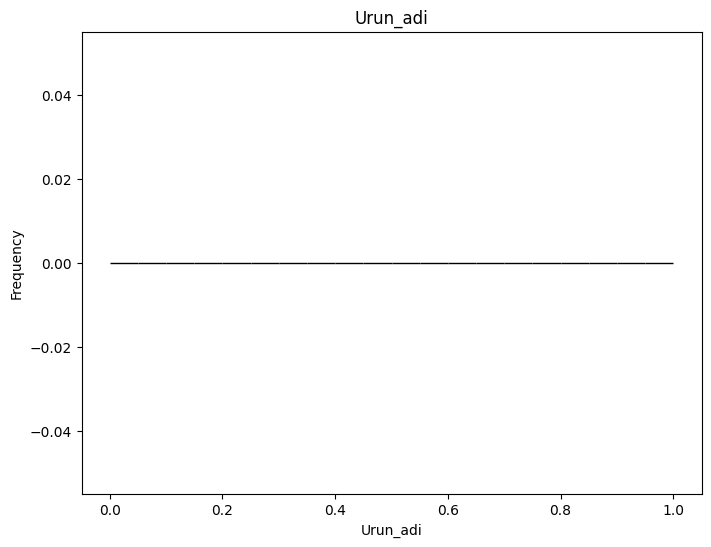

count     6960.0
unique      36.0
top          4.7
freq       941.0
Name: Puan, dtype: float64


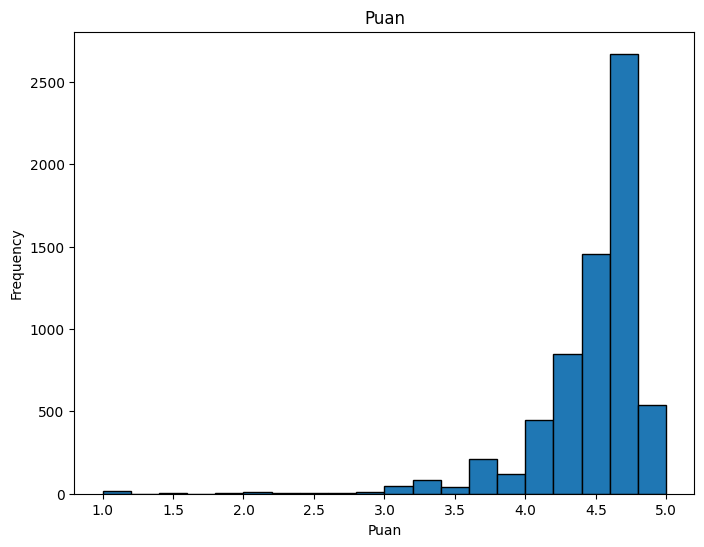

count          6960.0
mean       822.335057
std      13743.169012
min           -9999.0
5%            -9999.0
10%           -9999.0
20%               3.0
30%              15.0
40%              42.0
50%              92.0
60%             192.4
70%             391.0
80%            1064.4
90%            3009.9
95%           7846.55
99%          38137.89
max          471665.0
Name: Degerlendirme, dtype: Float64


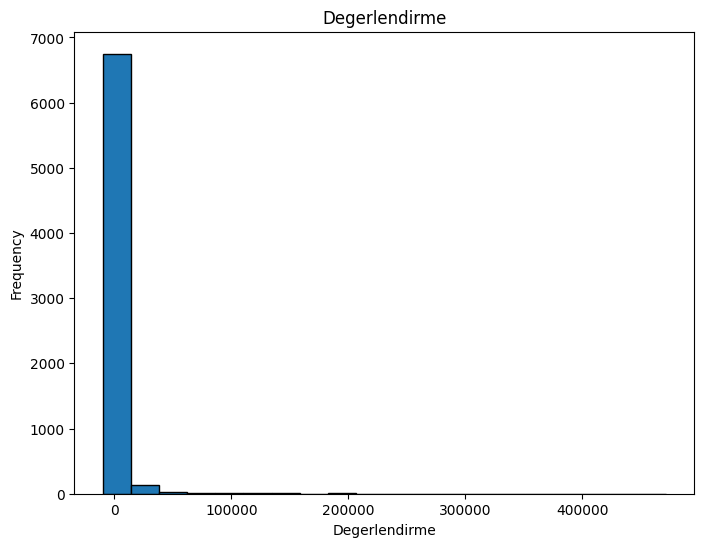

count     6960.0
unique    3871.0
top         11.0
freq       342.0
Name: Fiyatlar, dtype: float64


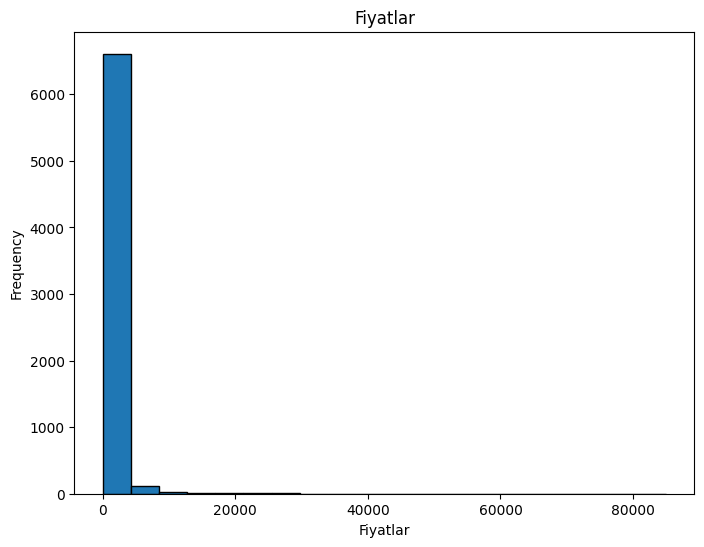

In [18]:
################################################################
# 3. Sayısal Değişken Analizi (Analysis of Numerical Variables)
################################################################
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int", "float"]]
cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]
cat_cols = cat_cols + num_but_cat
cat_cols = [col for col in cat_cols if col not in cat_but_car]

num_cols = [col for col in df.columns if df[col].dtypes in ["int","float"]]
num_cols = [col for col in num_cols if col not in cat_cols]


def num_summary(dataframe, numerical_cols):
    for numerical_col in numerical_cols:
        quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
        print(dataframe[numerical_col].describe(quantiles).T)
num_summary(df, df.columns)


def num_summary_with_plots(dataframe, numerical_cols, plot=False):
    for numerical_col in numerical_cols:
        quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
        print(dataframe[numerical_col].describe(quantiles).T)

        if plot:
            numeric_values = pd.to_numeric(dataframe[numerical_col], errors='coerce')
            
            numeric_values = numeric_values.dropna()
            
            # Plot the histogram
            plt.figure(figsize=(8, 6))
            plt.hist(numeric_values, bins=20, edgecolor='k')
            plt.xlabel(numerical_col)
            plt.ylabel('Frequency')
            plt.title(numerical_col)
            plt.show(block=True)
num_summary_with_plots(df, df.columns ,plot=True)

In [20]:
############################################################
# Değişkenlerin Yakalanması ve İşlemlerin Genelleştirilmesi
############################################################


def grab_col_names(dataframe, cat_th=10,  car_th=20):
    """
    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.

    Parameters
    ----------
    dataframe: dataframe
        değişken isimleri alınmak istenen dataframe'dir.
    cat_th: int, float
        numerik fakat kategorik olan değişkenler için sınıf eşik değeri
    car_th: int, float
        kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    -------
    cat_cols: list
        Kategorik değişken listesi
    num_cols: list
        Numerik değişken listesi
    cat_but_car: list
        Kategorik görünümlü kardinal değişken listesi

    Notes
    ------
    cat_cols + num_cols + cat_but_car = toplam değişken sayısı
    num_but_cat cat_cols'un içerisinde.

    """
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < 10 and dataframe[col].dtypes in ["int", "float"]]

    cat_but_car = [col for col in dataframe.columns if
                   dataframe[col].nunique() > 20 and str(dataframe[col].dtypes) in ["category", "object"]]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["int", "float"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)


def cat_summary(dataframe, col_names):
    for col_name in col_names:
        print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                            "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
        print("##########################################")

cat_summary(df, df.columns)



def num_summary_with_plots(dataframe, numerical_cols, plot=False):
    for numerical_col in numerical_cols:
        quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
        print(dataframe[numerical_col].describe(quantiles).T)

        if plot:
            dataframe[numerical_col].hist()
            plt.xlabel(numerical_col)
            plt.title(numerical_col)
            plt.show(block=True)


for col in num_cols:
    num_summary_with_plots(df, df.columns, plot=True)


Observations: 6960
Variables: 5
cat_cols: 0
num_cols: 0
cat_but_car: 4
num_but_cat: 0
                                                    Link     Ratio
Link                                                              
https://www.amazon.com.tr/Einhell-18V-Starter-B...     1  0.014368
https://www.amazon.com.tr/Elixir-009-042-Elektr...     1  0.014368
https://www.amazon.com.tr/Elektro-Akustik-Tek-H...     1  0.014368
https://www.amazon.com.tr/M-Audio-AIR-192-2-%C3...     1  0.014368
https://www.amazon.com.tr/RODE-Wireless-GO-II-m...     1  0.014368
...                                                  ...       ...
https://www.amazon.com.tr/Royal-Canin-German-Sh...     1  0.014368
https://www.amazon.com.tr/BYPET-Nesil-Nefes-Ala...     1  0.014368
https://www.amazon.com.tr/Brit-Tah%C4%B1ls%C4%B...     1  0.014368
https://www.amazon.com.tr/Reflex-Tavuklu-Yavru-...     1  0.014368
https://www.amazon.com.tr/Fause-Tepe-Ba%C5%9Fl%...     1  0.014368

[6960 rows x 2 columns]
##################

Observations: 6960
Variables: 5
cat_cols: 0
num_cols: 0
cat_but_car: 4
num_but_cat: 0
                                                    Link     Ratio
Link                                                              
https://www.amazon.com.tr/Einhell-18V-Starter-B...     1  0.014368
https://www.amazon.com.tr/Elixir-009-042-Elektr...     1  0.014368
https://www.amazon.com.tr/Elektro-Akustik-Tek-H...     1  0.014368
https://www.amazon.com.tr/M-Audio-AIR-192-2-%C3...     1  0.014368
https://www.amazon.com.tr/RODE-Wireless-GO-II-m...     1  0.014368
...                                                  ...       ...
https://www.amazon.com.tr/Royal-Canin-German-Sh...     1  0.014368
https://www.amazon.com.tr/BYPET-Nesil-Nefes-Ala...     1  0.014368
https://www.amazon.com.tr/Brit-Tah%C4%B1ls%C4%B...     1  0.014368
https://www.amazon.com.tr/Reflex-Tavuklu-Yavru-...     1  0.014368
https://www.amazon.com.tr/Fause-Tepe-Ba%C5%9Fl%...     1  0.014368

[6960 rows x 2 columns]
##################

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


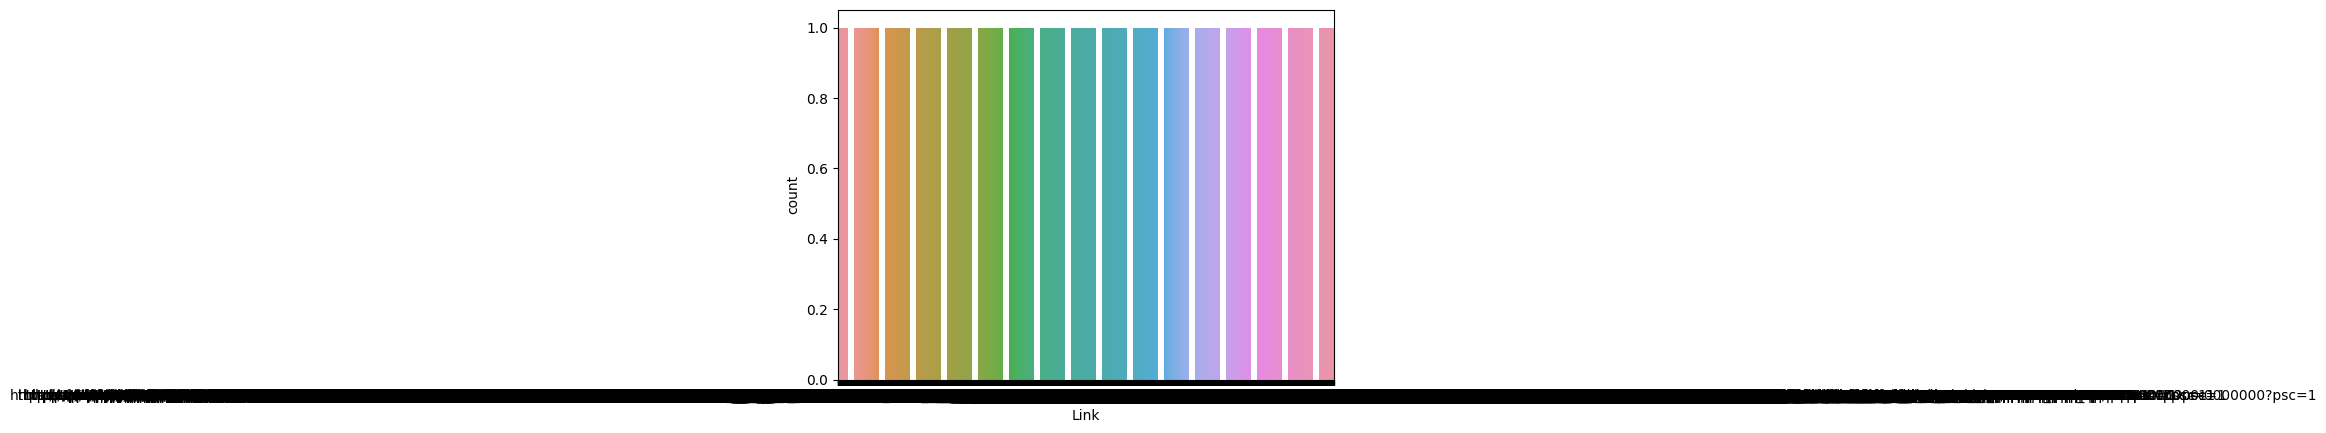

                                                    Urun_adi      Ratio
Urun_adi                                                               
NaN                                                     1185  17.025862
Amazon.com.tr E-Hediye Kartı                             161   2.313218
Crestwood Waterproof Kadın Ayakkabı                        3   0.043103
SALOMON QUEST ELEMENT GTX Yürüyüş Botu Erkek               3   0.043103
Philips SPS1040B/51 2 Metre 4lü Akım Koruyumalı...         3   0.043103
...                                                      ...        ...
PRO PLAN Medium Adult Kuzu Etli Köpek Maması 14 kg         1   0.014368
Otomatik Hareket Eden Akıllı Kedi Topu Oyuncağı...         1   0.014368
Düşük Tahıllı Tavuk Ve Narlı Kısırlaştırılmış K...         1   0.014368
Advance Somonlu Kısırlaştırılmış Kedi Maması, 3 Kg         1   0.014368
Fause Tepe Duş Başlığı Kare Slim 304 Metal 25x2...         1   0.014368

[5537 rows x 2 columns]
#######################################

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IP

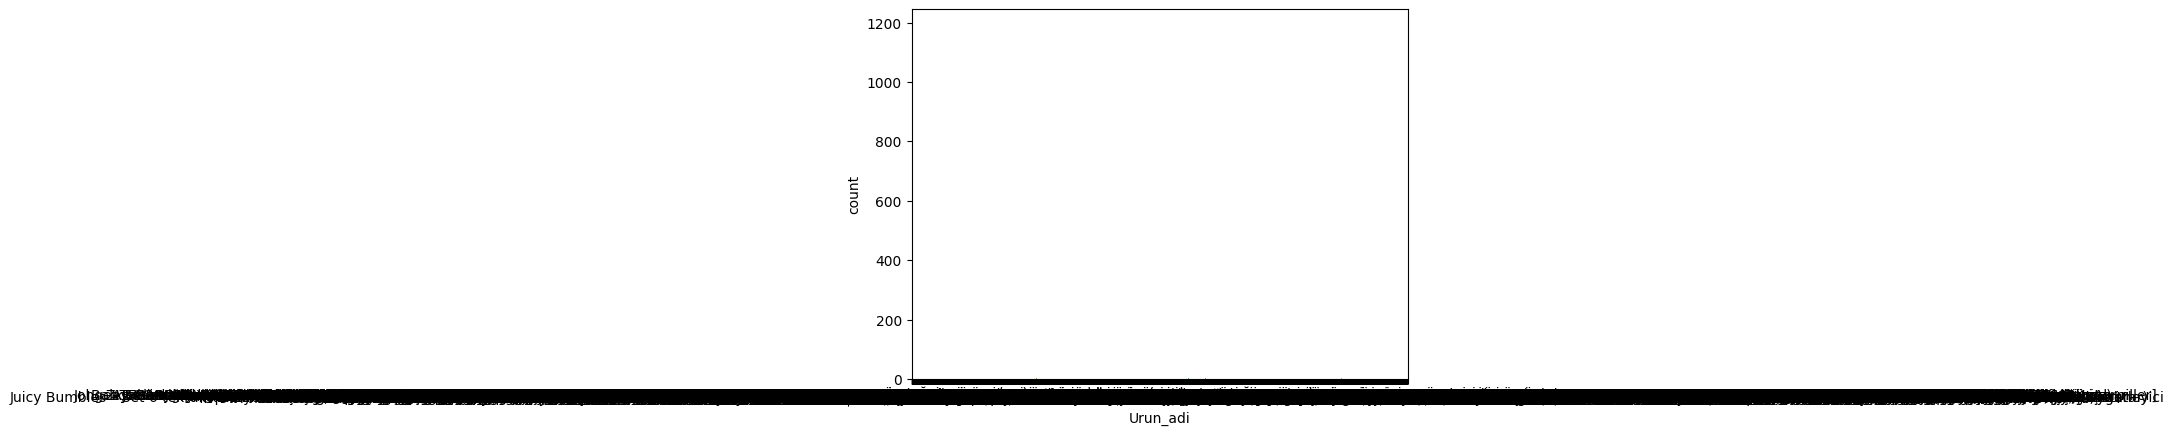

      Puan      Ratio
Puan                 
4.7    941  13.520115
4.6    941  13.520115
4.5    791  11.364943
4.8    788  11.321839
4.4    662   9.511494
4.3    477   6.853448
NaN    438   6.293103
4.2    369   5.301724
5.0    354   5.086207
4.1    255   3.663793
4.0    193   2.772989
4.9    186   2.672414
3.9    119   1.709770
3.8     94   1.350575
3.7     68   0.977011
3.6     49   0.704023
3.5     42   0.603448
3.4     41   0.589080
3.0     36   0.517241
3.3     27   0.387931
1.0     17   0.244253
3.2     16   0.229885
3.1     13   0.186782
2.9      9   0.129310
2.0      5   0.071839
2.5      5   0.071839
2.6      4   0.057471
2.4      4   0.057471
2.1      4   0.057471
2.7      3   0.043103
1.8      2   0.028736
2.3      2   0.028736
2.8      2   0.028736
1.5      1   0.014368
1.4      1   0.014368
2.2      1   0.014368
##########################################


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


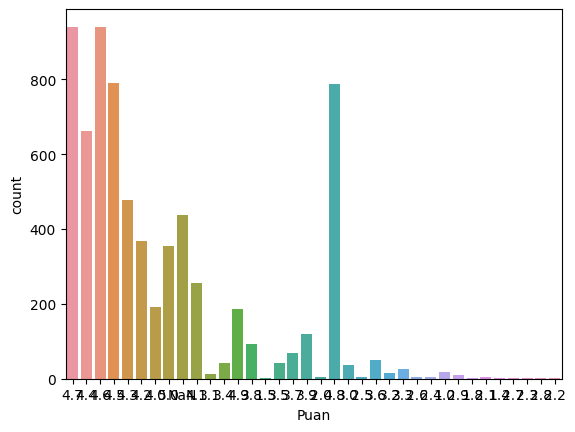

               Degerlendirme      Ratio
Degerlendirme                          
-9999                   1018  14.626437
1                        164   2.356322
1709                     161   2.313218
2                        131   1.882184
3                         90   1.293103
...                      ...        ...
358                        1   0.014368
1196                       1   0.014368
534                        1   0.014368
3050                       1   0.014368
709                        1   0.014368

[1832 rows x 2 columns]
##########################################


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


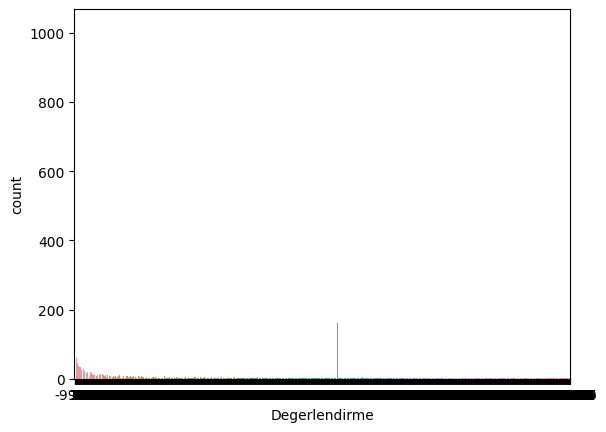

          Fiyatlar     Ratio
Fiyatlar                    
11.0           342  4.913793
Missing        169  2.428161
99.0            41  0.589080
59.9            34  0.488506
99.9            33  0.474138
...            ...       ...
47.75            1  0.014368
119.95           1  0.014368
97.73            1  0.014368
104.94           1  0.014368
534.9            1  0.014368

[3871 rows x 2 columns]
##########################################


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


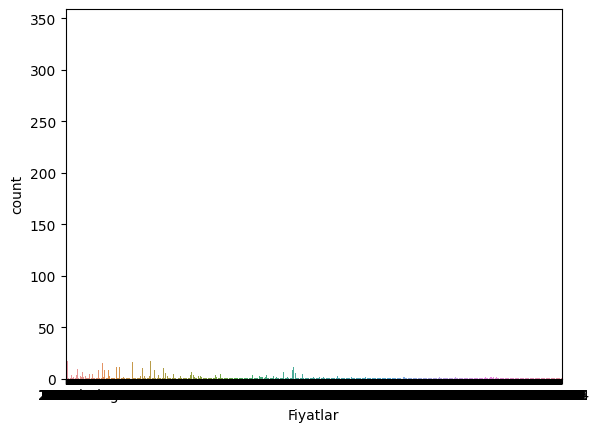

In [21]:
#########################################################
# 4. Hedef Değişken Analizi (Analysis of Target Variable)
######################################################### 

for col in df.columns:
    if df[col].dtypes == "bool":
        df[col] = df[col].astype(int)

def cat_summary(dataframe, col_names, plot=False):
    for col_name in col_names:
        print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                            "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
        print("##########################################")

        if plot:
            sns.countplot(x=dataframe[col_name], data=dataframe)
            plt.show(block=True)

def grab_col_names(dataframe, cat_th=10,  car_th=20):
    """
    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.

    Parameters
    ----------
    dataframe: dataframe
        değişken isimleri alınmak istenen dataframe'dir.
    cat_th: int, float
        numerik fakat kategorik olan değişkenler için sınıf eşik değeri
    car_th: int, float
        kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    -------
    cat_cols: list
        Kategorik değişken listesi
    num_cols: list
        Numerik değişken listesi
    cat_but_car: list
        Kategorik görünümlü kardinal değişken listesi

    Notes
    ------
    cat_cols + num_cols + cat_but_car = toplam değişken sayısı
    num_but_cat cat_cols'un içerisinde.

    """
    # cat_cols, cat_but_car
    cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]

    num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int", "float"]]

    cat_but_car = [col for col in df.columns if
                   df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in df.columns if df[col].dtypes in ["int", "float"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

df.head()

cat_summary(df, df.columns, plot=True)



In [25]:
df.to_csv("data/shaped_data.csv")